###Car Assignment 
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit.
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

    Which variables are significant in predicting the price of a car
    How well those variables describe the price of a car

In [39]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [40]:
#import statements 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Importing the required libraries for plots.
%matplotlib inline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

In [41]:
# Reading CarPrice_Assignment.csv
carprice_df = pd.read_csv('C:/Users/amanjha/Desktop/datsss/ML/LR ASS/CarPrice_Assignment.csv')

###Data understanding and EDA 

In [42]:
# Understanding data as part of EDA
carprice_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [43]:
#Shape of CarPrice_df
carprice_df.shape

(205, 26)

In [44]:
#Info of CarPrice_df
carprice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

No Null values present in data. We can also have a feel for data types 

In [45]:
# understanding the data
carprice_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [46]:
# Removing column Car_ID, as not significant 
carprice_df = carprice_df.drop(['car_ID'],axis=1)

In [47]:
#print(carprice_df.head())
# Seperating car and model name, deleteing the model name and saving car name only as category
for x in range(0,len(carprice_df)):
    (carprice_df['CarName'][x])= (carprice_df['CarName'][x].split(' ')[0])
    


In [48]:
print(carprice_df['CarName'].unique())
np.unique(carprice_df['CarName'], return_counts=True)
print(len(carprice_df['CarName'].unique()))

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']
28


We can have look on the above distinct value in the column car name. We can see that the foloowing values are same
maxda and mazda, the correct name is mazda ( count 15), similarly for porcshce,porsche, correct name porsche, and for toyota,toyouta, correct name toyota.lastly vokswagen,volkswagen, correct name vokswagen.nissan by Nissan



In [49]:
#Replacing all the incorrect values with correct on in column carname.
carprice_df['CarName'] = carprice_df['CarName'].replace(regex='maxda', value='mazda')
carprice_df['CarName'] = carprice_df['CarName'].replace(regex='porcshce', value='porsche')
carprice_df['CarName'] = carprice_df['CarName'].replace(regex='toyouta', value='toyota')
carprice_df['CarName'] = carprice_df['CarName'].replace(regex='vokswagen', value='volkswagen')
carprice_df['CarName'] = carprice_df['CarName'].replace(regex='nissan', value='Nissan')
#print(carprice_df['CarName'])
print(len(carprice_df['CarName'].unique()))
print(sorted(carprice_df['CarName'].unique()))

23
['Nissan', 'alfa-romero', 'audi', 'bmw', 'buick', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercury', 'mitsubishi', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'toyota', 'volkswagen', 'volvo', 'vw']


to use car name as a better categorical value, looking at the mean prices of all car.

In [50]:
pd.core.frame.DataFrame
carname_price_df=pd.DataFrame()
carname_price_df=carprice_df[['CarName','price']]
carname_price_df=carname_price_df.sort_values(by=['CarName'])
mean_carbeands=carname_price_df.groupby('CarName')['price'].mean()
print((mean_carbeands))


CarName
Nissan         10415.666667
alfa-romero    15498.333333
audi           17859.166714
bmw            26118.750000
buick          33647.000000
chevrolet       6007.000000
dodge           7875.444444
honda           8184.692308
isuzu           8916.500000
jaguar         34600.000000
mazda          10652.882353
mercury        16503.000000
mitsubishi      9239.769231
peugeot        15489.090909
plymouth        7963.428571
porsche        31400.500000
renault         9595.000000
saab           15223.333333
subaru          8541.250000
toyota          9885.812500
volkswagen      9935.500000
volvo          18063.181818
vw             10787.500000
Name: price, dtype: float64


by looking closer to the data,we can further dedive these cars to 3 broder categories. seg10k, seg20k,seg30k for price lesses than 10k,20k and 30k 

seg10 cars- chevrolet,dodge,plymouth,honda,subaru,isuzu,mitsubishi,renault,toyota,volkswagen     
seg20 cars- mazda,nissan,vw,saab,peugeot,alfa-romero,mercury,audi,volvo,Nissan                             
seg30 cars- bmw,porsche,buick,jaguar

In [51]:
for x in range(0,len(carprice_df)):
    if carprice_df['CarName'][x]in('chevrolet','dodge','plymouth','honda','subaru','isuzu','mitsubishi','renault','toyota','volkswagen'):
        carprice_df['CarName'][x]= 'seg10'
    elif carprice_df['CarName'][x]in('mazda','nissan','vw','saab','peugeot','alfa-romero','mercury','audi','volvo','Nissan'):
        carprice_df['CarName'][x]= 'seg20'
    else:
        carprice_df['CarName'][x]= 'seg30'
    

In [52]:
print(carprice_df.head())

   symboling CarName fueltype aspiration doornumber      carbody drivewheel enginelocation  wheelbase  carlength  carwidth  carheight  curbweight enginetype cylindernumber  enginesize fuelsystem  boreratio  stroke  compressionratio  horsepower  peakrpm  citympg  highwaympg    price
0          3   seg20      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  13495.0
1          3   seg20      gas        std        two  convertible        rwd          front       88.6      168.8      64.1       48.8        2548       dohc           four         130       mpfi       3.47    2.68               9.0         111     5000       21          27  16500.0
2          1   seg20      gas        std        two    hatchback        rwd          front       94.5      171.2      65.5       52.4        2823      

#Step 2: Visualising the Data

#Let's now visualise our data using seaborn. We'll first make a pairplot of all the variables present to visualise which variables are most correlated to price.


In [53]:
#segmenting numerical columns and categorical columns 
#checking if the no of distinct values in a column is less the 10% of the data, than categorical
cat_var=[]
numeric_var=[]
total_row=len(carprice_df)
for x in carprice_df.columns.values:
    no_of_unique_val= len(carprice_df[x].unique())
    if no_of_unique_val/total_row<=0.1:
        cat_var.append(x)
    else:
        numeric_var.append(x)
print(cat_var)
print(numeric_var)
        
    

['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']


In [54]:
numeric_var=(sorted(numeric_var))
#print(len(numeric_var))
#interchnaging the position of price and boreratio, for a better visual reppresentation
a, b = numeric_var.index('boreratio'), numeric_var.index('price')
numeric_var[b], numeric_var[a] = numeric_var[a], numeric_var[b]
carprice_num_df=carprice_df[numeric_var]


In [55]:
carprice_num_df.head()

,price,carheight,carlength,carwidth,citympg,compressionratio,curbweight,enginesize,highwaympg,horsepower,peakrpm,boreratio,stroke,wheelbase
0,13495.0,48.8,168.8,64.1,21,9.0,2548,130,27,111,5000,3.47,2.68,88.6
1,16500.0,48.8,168.8,64.1,21,9.0,2548,130,27,111,5000,3.47,2.68,88.6
2,16500.0,52.4,171.2,65.5,19,9.0,2823,152,26,154,5000,2.68,3.47,94.5
3,13950.0,54.3,176.6,66.2,24,10.0,2337,109,30,102,5500,3.19,3.40,99.8
4,17450.0,54.3,176.6,66.4,18,8.0,2824,136,22,115,5500,3.19,3.40,99.4


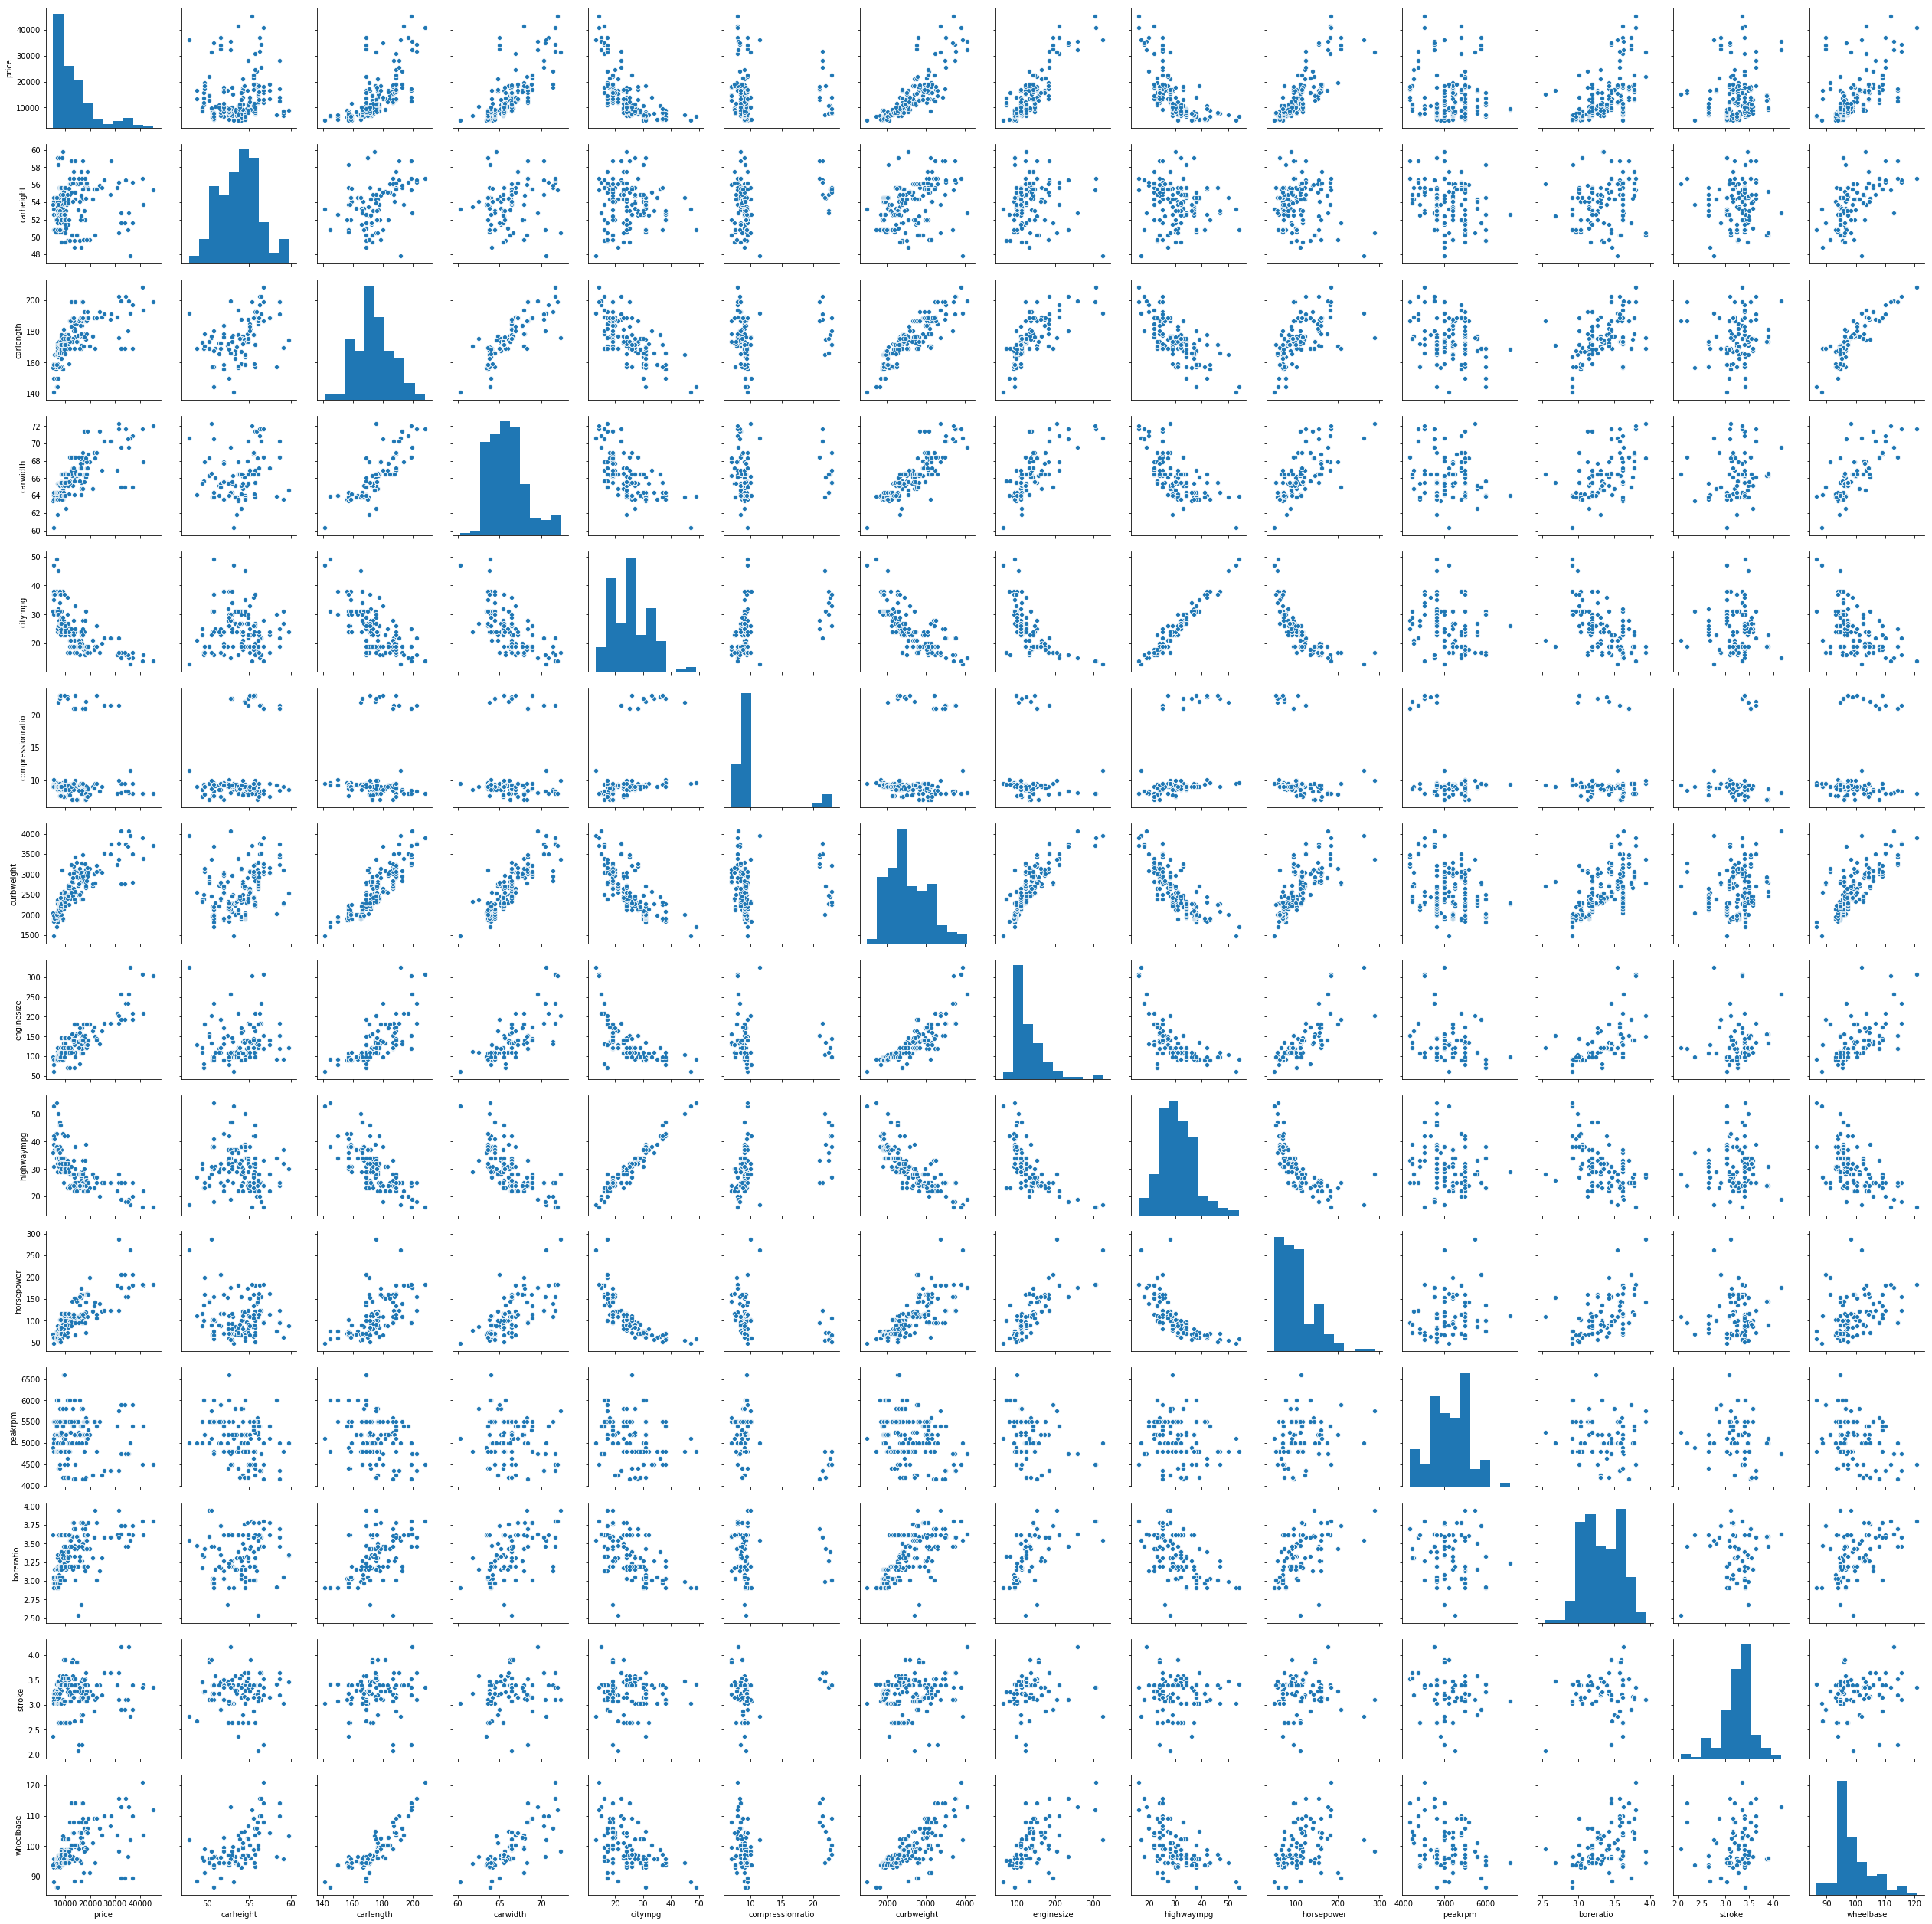

In [56]:
sns.pairplot(carprice_num_df)
plt.show()

the pair plot gives us a no of columns with which it has linear relationship, to understand it further ploting only price with other columns

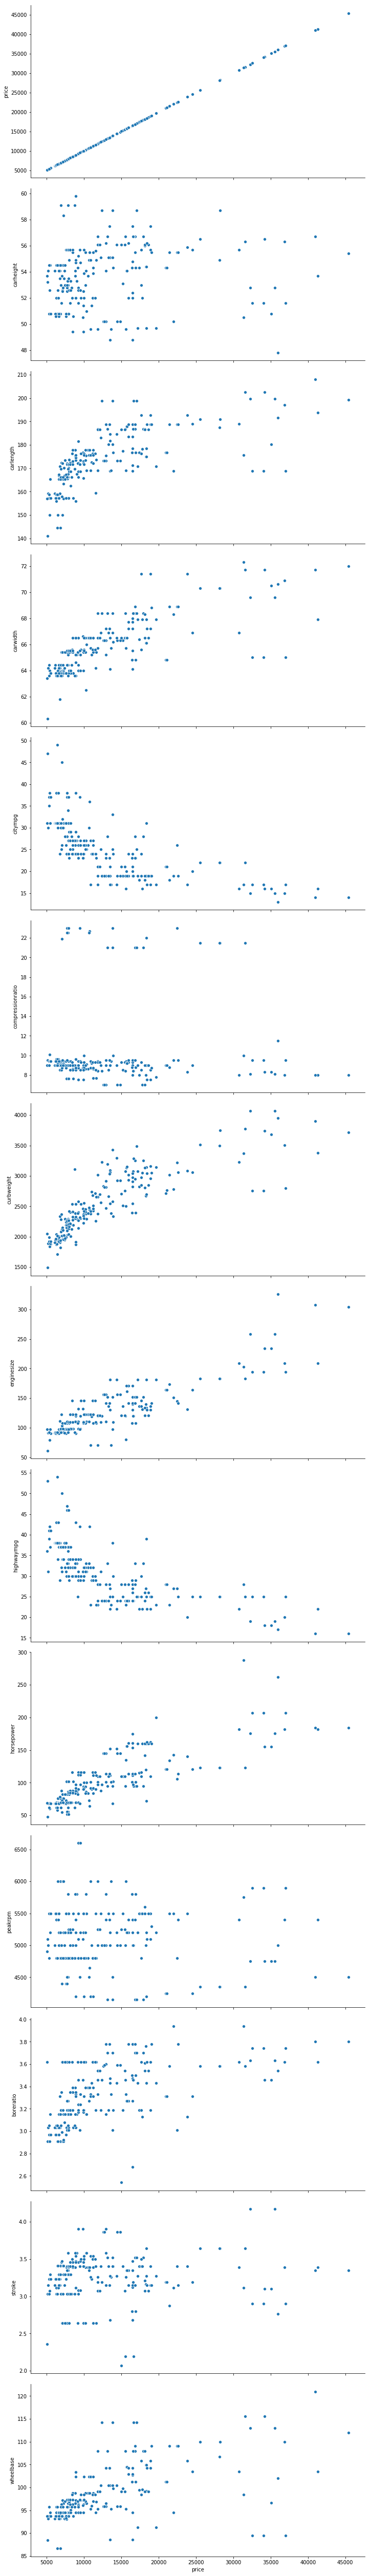

In [57]:
sns.pairplot(carprice_df, x_vars='price', y_vars=numeric_var,height=5, aspect=2, kind='scatter')
plt.show()

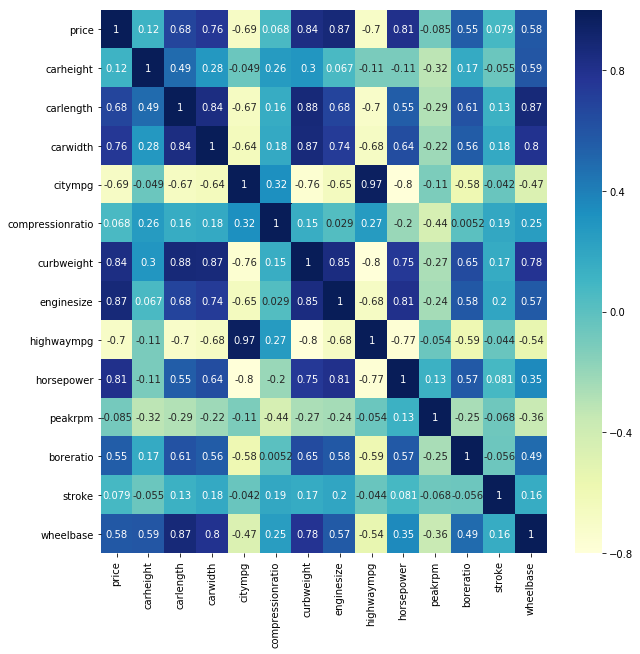

In [58]:
#ploting correlation between the numeric columns of the dataset
fig, ax = plt.subplots(figsize=(10,10))   
sns.heatmap(carprice_num_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

By the above heatmap,we can have a closer look at the correlation between the price and the other numeric columns

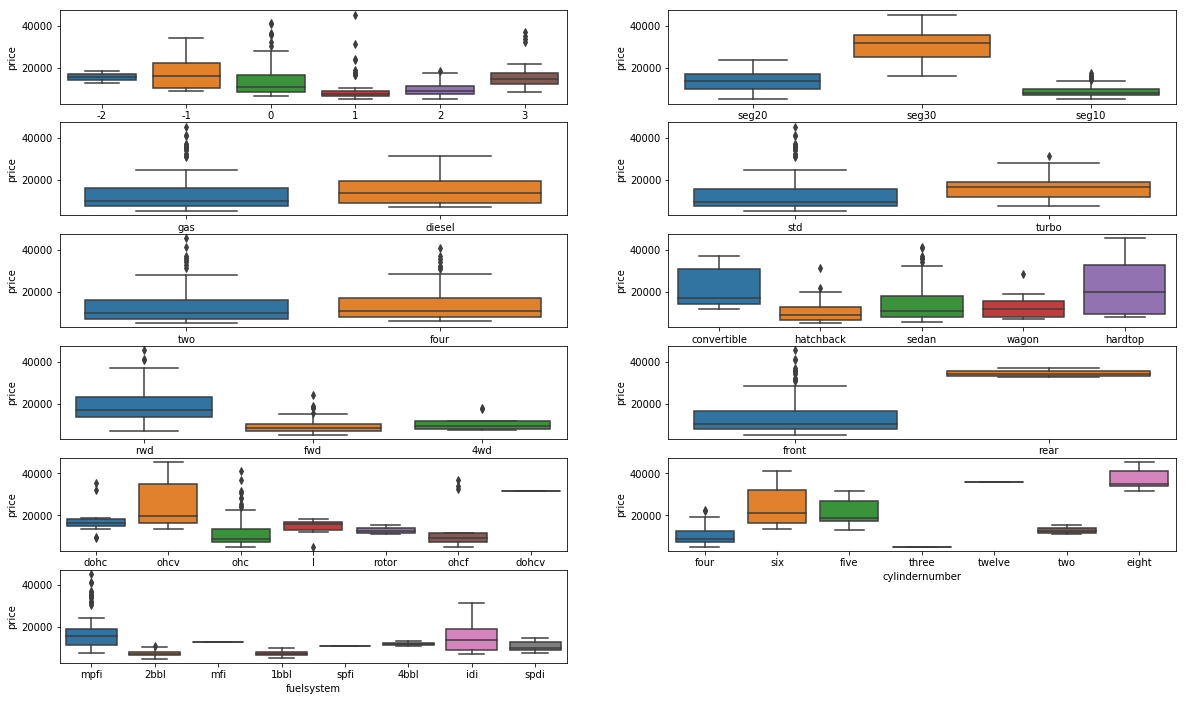

In [59]:
#Ploting categorical variable for insight
plt.figure(figsize=(20, 12))
fig.tight_layout()
plt.subplot(6,2,1)
sns.boxplot(x = 'symboling', y = 'price', data = carprice_df)
plt.subplot(6,2,2)
sns.boxplot(x = 'CarName', y = 'price', data = carprice_df)
plt.subplot(6,2,3)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice_df)
plt.subplot(6,2,4)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice_df)
plt.subplot(6,2,5)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice_df)
plt.subplot(6,2,6)
sns.boxplot(x = 'carbody', y = 'price', data = carprice_df)
plt.subplot(6,2,7)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice_df)
plt.subplot(6,2,8)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice_df)
plt.subplot(6,2,9)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice_df)
plt.subplot(6,2,10)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice_df)
plt.subplot(6,2,11)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice_df)



From the above graphs of caregorical values we can easily visualize the devison in the sub catrgories. 

In [60]:
#saving a copy of the main df 
base_carprice_df= carprice_df

### Data Preparation
Main task to the understand the categorical variables and convert them to dummies/labels using encoder or get dummy      
to achieve this 1st we have to check number of distinct values in the categorical cols

In [61]:
#print all the distinct values of categorical features 
carprice_cat_df= carprice_df[cat_var]
print(carprice_cat_df['symboling'].unique())  #[ 3  1  2  0 -1 -2]
print(carprice_cat_df['fueltype'].unique())   #['gas' 'diesel']
print(carprice_cat_df['aspiration'].unique())   #['std' 'turbo']
print(carprice_cat_df['doornumber'].unique())#['two' 'four']
print(carprice_cat_df['carbody'].unique())   #['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
print(carprice_cat_df['drivewheel'].unique())  #['rwd' 'fwd' '4wd']
print(carprice_cat_df['enginelocation'].unique())  #['front' 'rear']
print(carprice_cat_df['enginetype'].unique())  #['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
print(carprice_cat_df['cylindernumber'].unique())  #['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
print(carprice_cat_df['fuelsystem'].unique())  #['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
print(carprice_cat_df['CarName'].unique())  #['seg20' 'seg30' 'seg10']


[ 3  1  2  0 -1 -2]
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']
['seg20' 'seg30' 'seg10']


using label encoder converting values for following column symboling,doornumber,cylindernumber                          
using dummies converting values for following column fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,CarName

In [62]:
# Get the dummy variables for the feature fueltype, aspiration, carbody, drivewheel, enginelocation, enginetype, fuelsystem, CarName
cat_list=['fueltype','aspiration','enginelocation','drivewheel','carbody', 'enginetype', 'fuelsystem','CarName']
coverted_cat_df =  pd.DataFrame()
#assigning dummy variables to the categorical coloumns selected as above 
for x in  range(0,len(cat_list)):
    coverted_1_df = pd.get_dummies(carprice_df[cat_list[x]])
    #rint(coverted_1_df.head())
    coverted_cat_df=pd.concat([coverted_cat_df, coverted_1_df], axis = 1)

# Check what the dataset 'status' looks like
coverted_cat_df.drop('diesel', inplace = True, axis=1)
coverted_cat_df.drop('turbo', inplace = True, axis=1)
coverted_cat_df.drop('rear', inplace = True, axis=1)
coverted_cat_df.drop('4wd', inplace = True, axis=1)
coverted_cat_df.drop('convertible', inplace = True, axis=1)
coverted_cat_df.drop('dohc', inplace = True, axis=1)
coverted_cat_df.drop('1bbl', inplace = True, axis=1)
coverted_cat_df.drop('seg10', inplace = True, axis=1)
carprice_prepd_df = pd.concat([coverted_cat_df, carprice_df],axis=1)
print(carprice_prepd_df.columns)

Index(['gas', 'std', 'front', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'seg20', 'seg30', 'symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'], dtype='object')


In [63]:
le = preprocessing.LabelEncoder() 
#using label encoder, encoding the follwoing categorical columns symboling,doornumber,cylindernumber 
carprice_prepd_df['symboling'] = le.fit_transform(carprice_prepd_df['symboling'])
carprice_prepd_df['doornumber'] = le.fit_transform(carprice_prepd_df['doornumber'])
carprice_prepd_df['cylindernumber'] = le.fit_transform(carprice_prepd_df['cylindernumber'])

In [68]:
#pd.set_option('display.max_rows', 500)
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
carprice_prepd_df.drop(cat_list,axis=1,inplace=True)
#print(carprice_prepd_df.head())

In [70]:
print(carprice_prepd_df.columns)

Index(['gas', 'std', 'front', 'fwd', 'rwd', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor', '2bbl', '4bbl', 'idi', 'mfi', 'mpfi', 'spdi', 'spfi', 'seg20', 'seg30', 'symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'], dtype='object')


## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split. Deviding train and test data in ratio of 70:30

In [71]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice_prepd_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [72]:
#check the shape and content of the newly cretaed train and test dataframe
print(df_test.shape)
print(df_train.shape)
#print(df_train['seg20'])


(62, 41)
(143, 41)


### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model.  it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

 we will use MinMax scaling.

In [73]:
scaler = MinMaxScaler()

In [74]:
df_train[numeric_var] = scaler.fit_transform(df_train[numeric_var])

In [75]:
#creating backup of train and test data
df_train_back=df_train
df_test_back=df_test

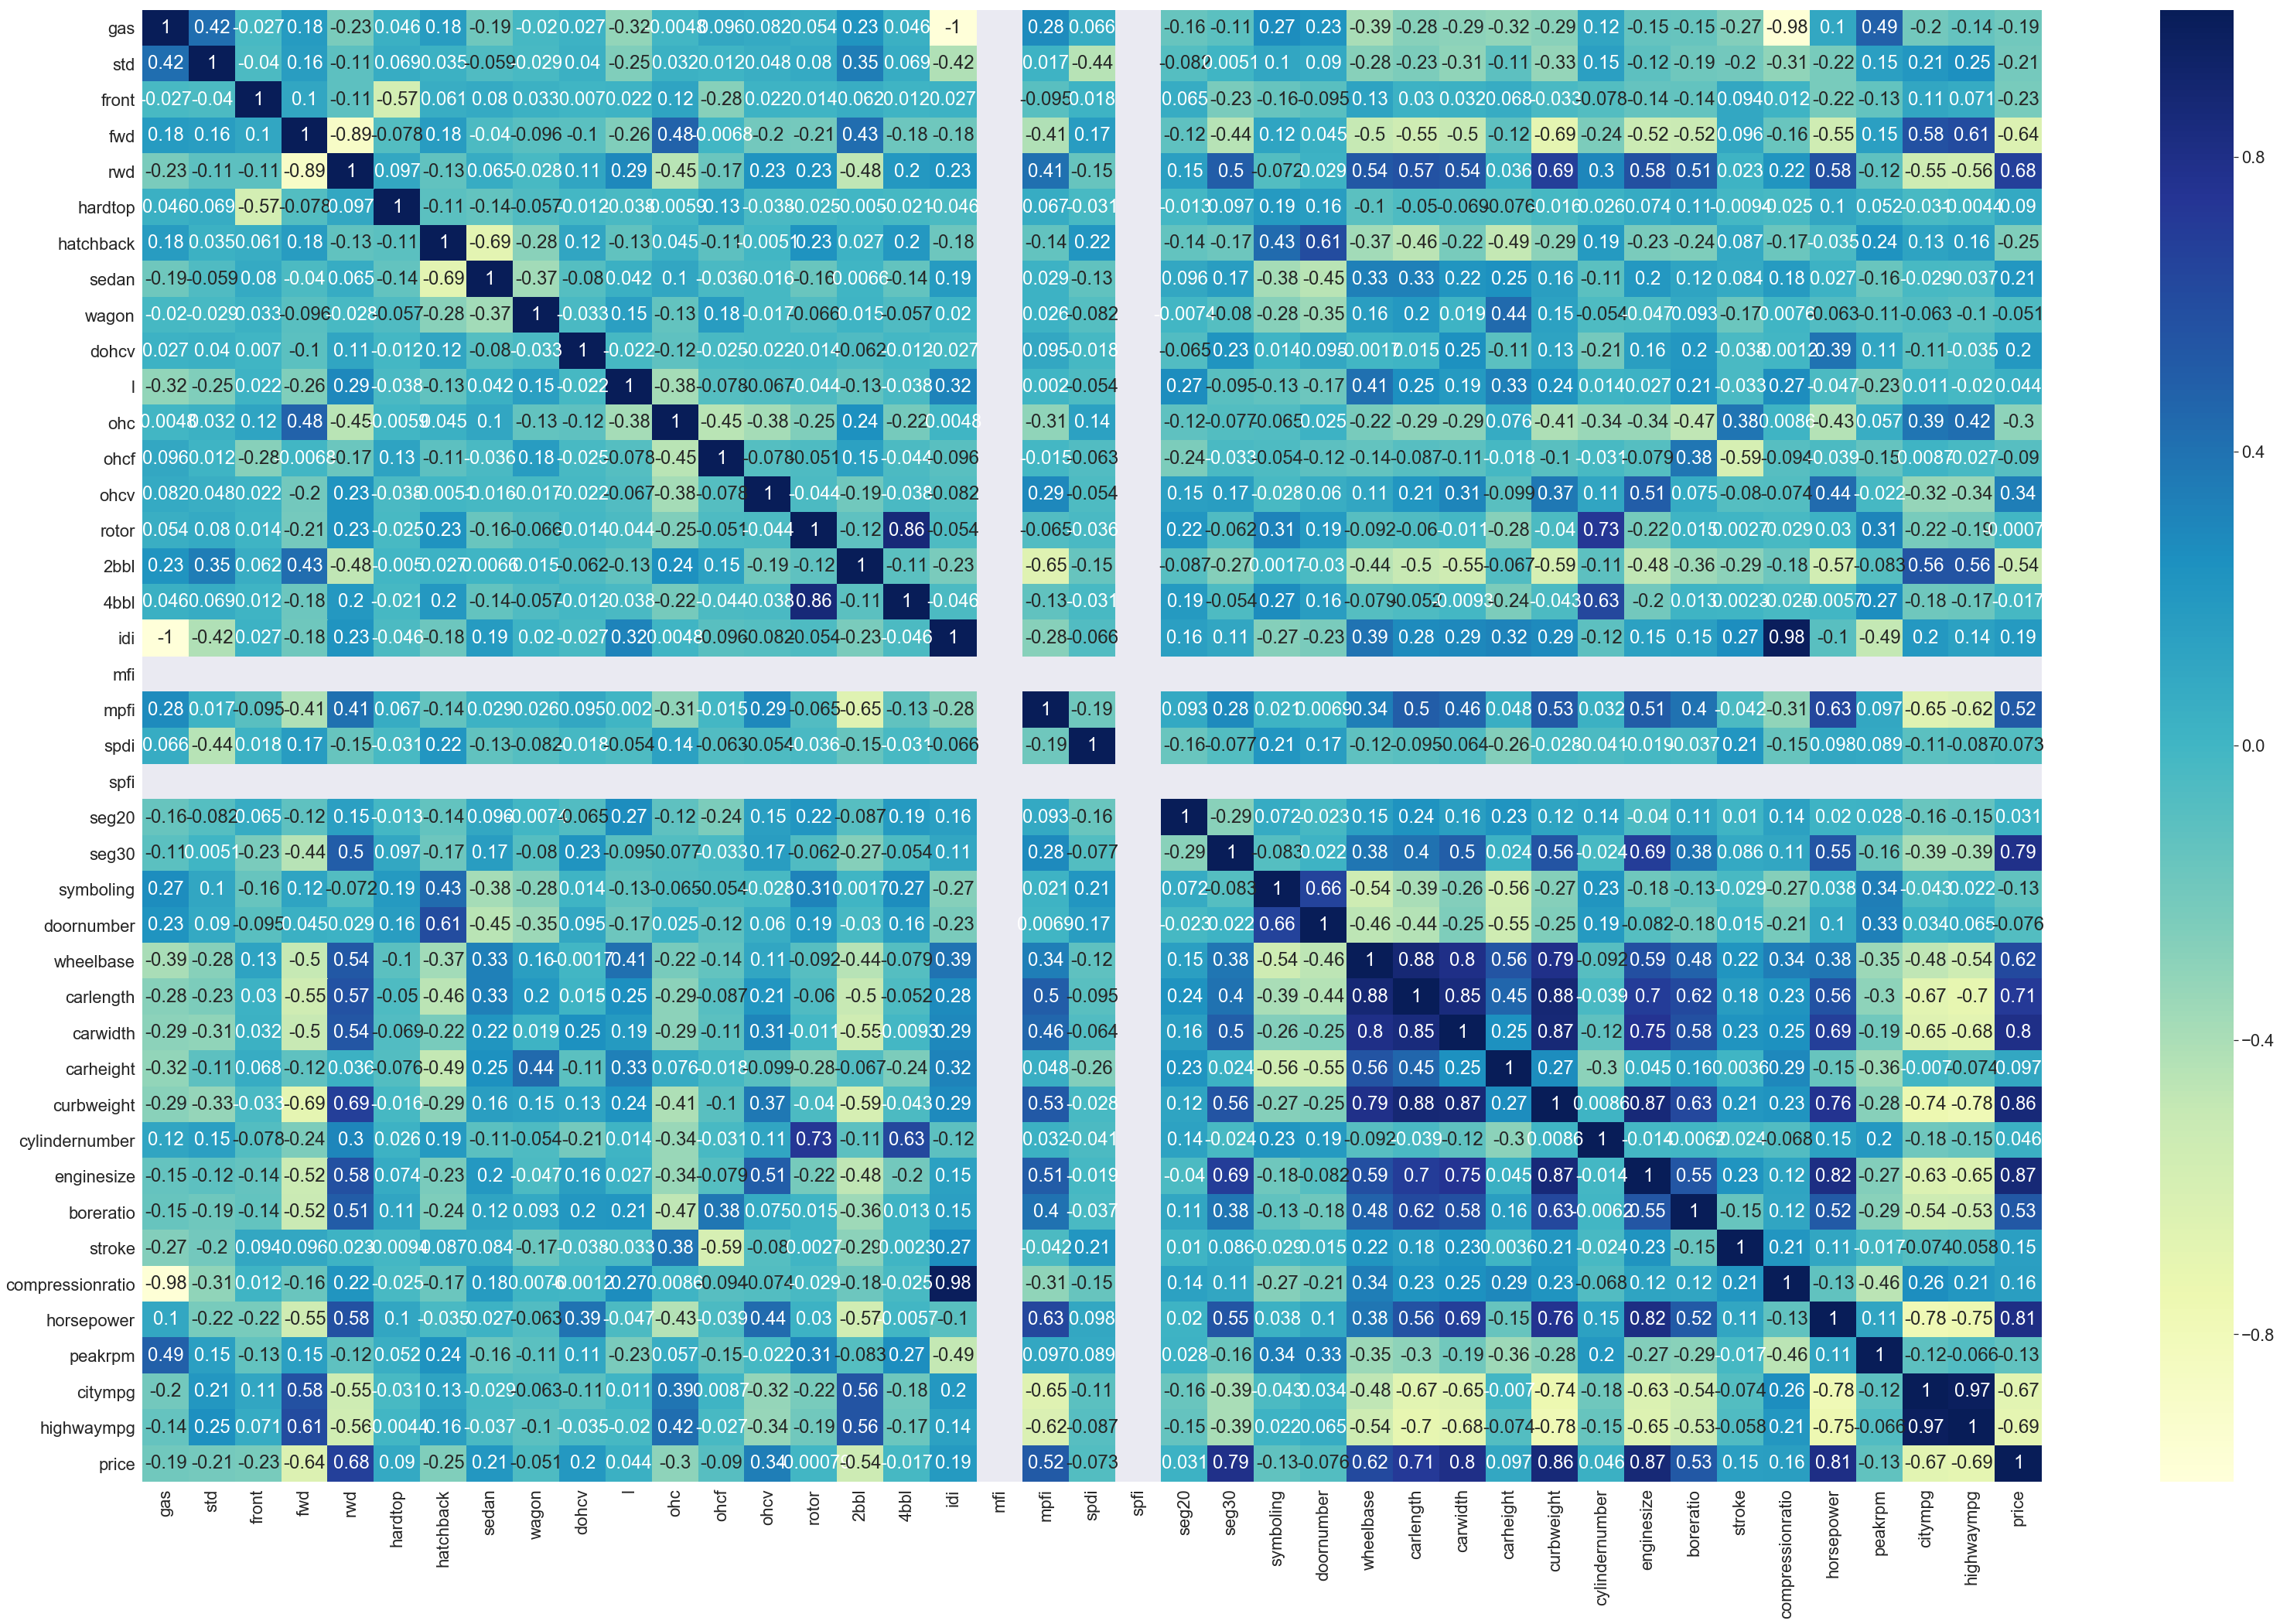

In [76]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (55, 35))
sns.set(font_scale=2)
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Dividing into X and Y sets for the model building

In [77]:
y_train = df_train.pop('price')
X_train = df_train

In [78]:
# Running RFE with the output number of the variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 20)             # running RFE for 20 varibales 
rfe = rfe.fit(X_train, y_train)

In [79]:
col = X_train.columns[rfe.support_]
col

Index(['gas', 'front', 'hardtop', 'hatchback', 'sedan', 'wagon', 'dohcv', 'rotor', 'idi', 'spdi', 'seg30', 'wheelbase', 'carwidth', 'curbweight', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'highwaympg'], dtype='object')

In [80]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('gas', True, 1),
 ('std', False, 11),
 ('front', True, 1),
 ('fwd', False, 14),
 ('rwd', False, 9),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('dohcv', True, 1),
 ('l', False, 8),
 ('ohc', False, 4),
 ('ohcf', False, 5),
 ('ohcv', False, 7),
 ('rotor', True, 1),
 ('2bbl', False, 19),
 ('4bbl', False, 12),
 ('idi', True, 1),
 ('mfi', False, 21),
 ('mpfi', False, 15),
 ('spdi', True, 1),
 ('spfi', False, 20),
 ('seg20', False, 6),
 ('seg30', True, 1),
 ('symboling', False, 17),
 ('doornumber', False, 16),
 ('wheelbase', True, 1),
 ('carlength', False, 10),
 ('carwidth', True, 1),
 ('carheight', False, 18),
 ('curbweight', True, 1),
 ('cylindernumber', False, 13),
 ('enginesize', False, 2),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', True, 1),
 ('horsepower', True, 1),
 ('peakrpm', True, 1),
 ('citympg', False, 3),
 ('highwaympg', True, 1)]

In [81]:
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
col = X_train.columns[rfe.support_]
global X_train_rfe 
X_train_rfe = X_train[col]
def P_Val_VIF_Val(X_train_rfe):
    X_train_rfe = sm.add_constant(X_train_rfe)
    lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
    global lm_model
    lm_model = lm
    print(lm.summary())
    # Calculate the VIFs for the new model
    vif = pd.DataFrame()
    X = X_train_rfe
    X.drop('const',axis=1,inplace= True)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. Remember that in `statsmodels`, you need to explicitly fit a constant using `sm.add_constant(X)` because if we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

In [82]:
P_Val_VIF_Val(X_train_rfe)
X_train_rfe = sm.add_constant(X_train_rfe)
print(X_train_rfe.columns)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     103.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           3.09e-66
Time:                        23:00:13   Log-Likelihood:                 219.57
No. Observations:                 143   AIC:                            -399.1
Df Residuals:                     123   BIC:                            -339.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1795      0.080  

In [83]:
#Testing one by one today chnages
#X_train_rfe.drop(['gas'] #,'hardtop','rotor','idi','spdi','wheelbase','curbweight','boreratio','compressionratio','peakrpm','highwaympg'], axis = 1, inplace = True)
#P_Val_VIF_Val(X_train_rfe)

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

Maybe we could drop some?

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information. 

In [84]:
X_train_rfe.drop(['gas','hardtop','rotor','idi','spdi','wheelbase','curbweight','boreratio','compressionratio','peakrpm','highwaympg'], axis = 1, inplace = True)
P_Val_VIF_Val(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     168.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.00e-68
Time:                        23:00:13   Log-Likelihood:                 196.78
No. Observations:                 143   AIC:                            -373.6
Df Residuals:                     133   BIC:                            -343.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0533      0.069      0.769      0.4

In [85]:
X_train_rfe.drop(['stroke'], axis = 1, inplace = True)
P_Val_VIF_Val(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     190.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.82e-69
Time:                        23:00:13   Log-Likelihood:                 196.77
No. Observations:                 143   AIC:                            -375.5
Df Residuals:                     134   BIC:                            -348.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0543      0.068      0.794      0.4

In [86]:
X_train_rfe.drop(['front','wagon'], axis = 1, inplace = True)
P_Val_VIF_Val(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     236.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.09e-69
Time:                        23:00:22   Log-Likelihood:                 191.23
No. Observations:                 143   AIC:                            -368.5
Df Residuals:                     136   BIC:                            -347.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0898      0.020     -4.508      0.0

In [87]:
X_train_rfe.drop(['sedan'], axis = 1, inplace = True)
P_Val_VIF_Val(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     284.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.57e-70
Time:                        23:00:24   Log-Likelihood:                 190.93
No. Observations:                 143   AIC:                            -369.9
Df Residuals:                     137   BIC:                            -352.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.018     -5.530      0.0

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [88]:
print(X_train_rfe.columns)
y_train_price = lm_model.predict(X_train_rfe)

Index(['const', 'hatchback', 'dohcv', 'seg30', 'carwidth', 'horsepower'], dtype='object')


Text(0.5, 0, 'Errors')

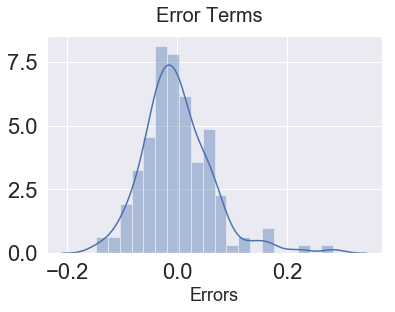

In [89]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [90]:
df_test[numeric_var] = scaler.transform(df_test[numeric_var])


In [91]:
y_test = df_test.pop('price')
X_test = df_test


In [92]:
X_train_rfe.drop('const',axis=1,inplace= True)


In [93]:
print((X_train_rfe.shape))

(143, 5)


In [94]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_rfe.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [95]:
# Making predictions
y_pred = lm_model.predict(X_test_new)

Text(0, 0.5, 'y_pred')

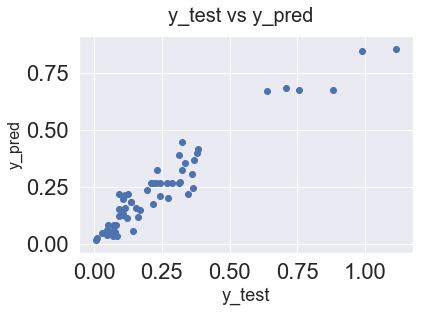

In [96]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [97]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9094353587467601

In [98]:
mse = mean_squared_error(y_pred, y_test)
r_squared = r2_score(y_pred, y_test)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 0.004840520218217801
r_square_value : 0.8736282348022282


Variables on which price depends in US market are 'hatchback', 'dohcv', 'seg30', 'carwidth', 'horsepower'.
From above we can say that the seg30 that comparies of car brands bmw,porsche,buick,jaguar are good to start the manufacture or production to enter the market.  Hatchback is the carbody type for that US citizen are ready to pay and are aslo much more interested. enginetype of dohcv mostly preferred.And Carwith and horsepower are the other variables which has strong impact. 

Mean_Squared_Error : 0.004840520218217801 is in decimals, thus the model is acturate with a r2_score of 0.9094353587467601 and r_square_value : 0.8736282348022282 on test data. On training data r_square_value is .909, thus explaining the varience in the data. Negative values of AIC/BIC also helps us to gain confidence on the model prepared.
In the above graphs we can also see the other important factors behaviours.